# Time Series Decompositions:

##### Decomposition is the process of deconstructing time series data into its components that are assumed to underly the patterns in the data.

##### The components usually consist of;

* Trend (T): which is the underlying trend of the data
* Seasonal (S): which is the seasonal pattern of the data
* Remainder (R): which is the residuals left after trend and seasonal components are subtracted from the data.

##### Two main methods of Time Series Decomposition are;
* Additive : Y = T + S + R
* Multiplicative: Y = T x S x R

##### The performance of the decomposition method can be inferred from the remainder component. 

If the remainder component is;
* Centered around 0 for additive method or around 1 for multiplicative method,
* Its mean and variance are stationary over time

Then the trend and seasonal components can be assumed to have captured the underlying patterns of the data

In [1]:
#Import pandas for loading a time series dataframe and matplotlib for some plotting
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the AirPassengers Data
#https://www.kaggle.com/rakannimer/air-passengers
df = pd.read_csv("/home/hasan/Desktop/Codes/yzt_main/datasets/AirPassengers.csv", index_col=0)
df

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


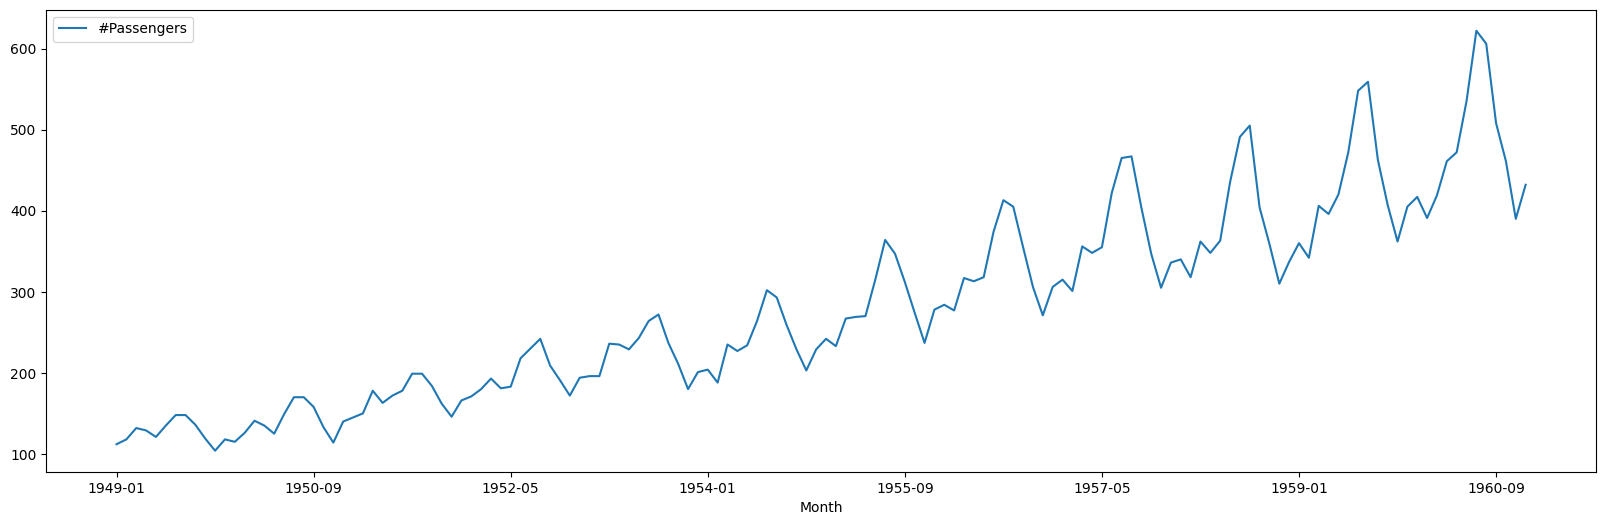

In [3]:
#Plot to visualize the time series data
df.plot(figsize=(20,6))
plt.show()

In [4]:
#Import the decomposition module from chronokit
from chronokit import decomposition

### Classical Decomposition

##### Classical decomposition is a simple method for decomposing a time series
##### The trend component is estimated by moving averages and the seasonal component is assumed to be constant through periods

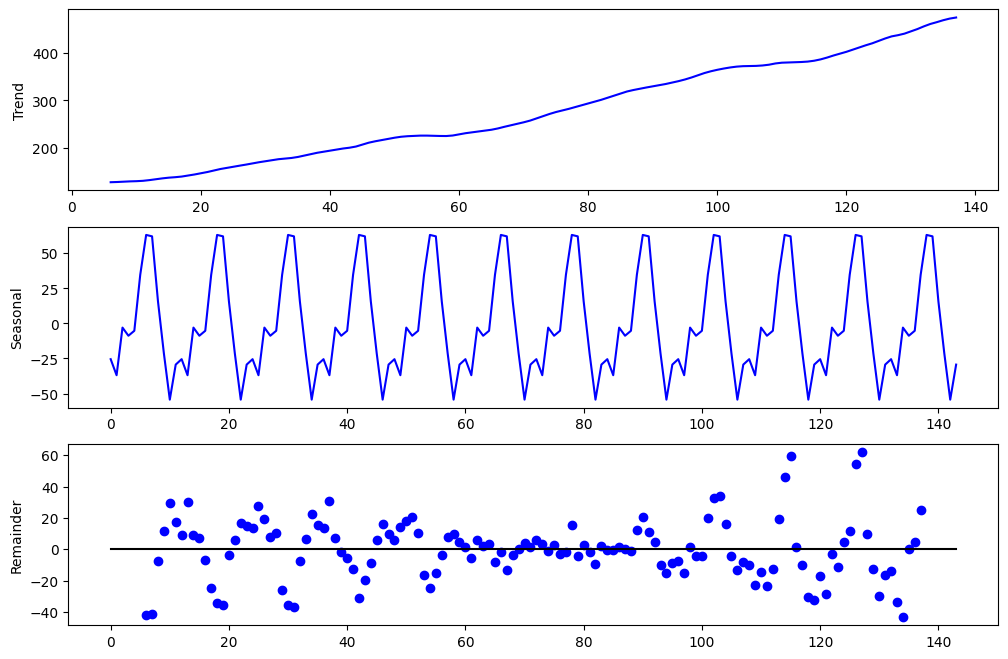

In [5]:
#decomposition.classical_decomposition() will return the estimated trend, seasonal and remainder components
#The seasonal_period argument designates the assumed length of a seasonal cycle in the given data
#The show argument will plot the decomposition results
trend, seasonal, remainder = decomposition.classical_decomposition(data=df, seasonal_period=12, method="add", show=True)

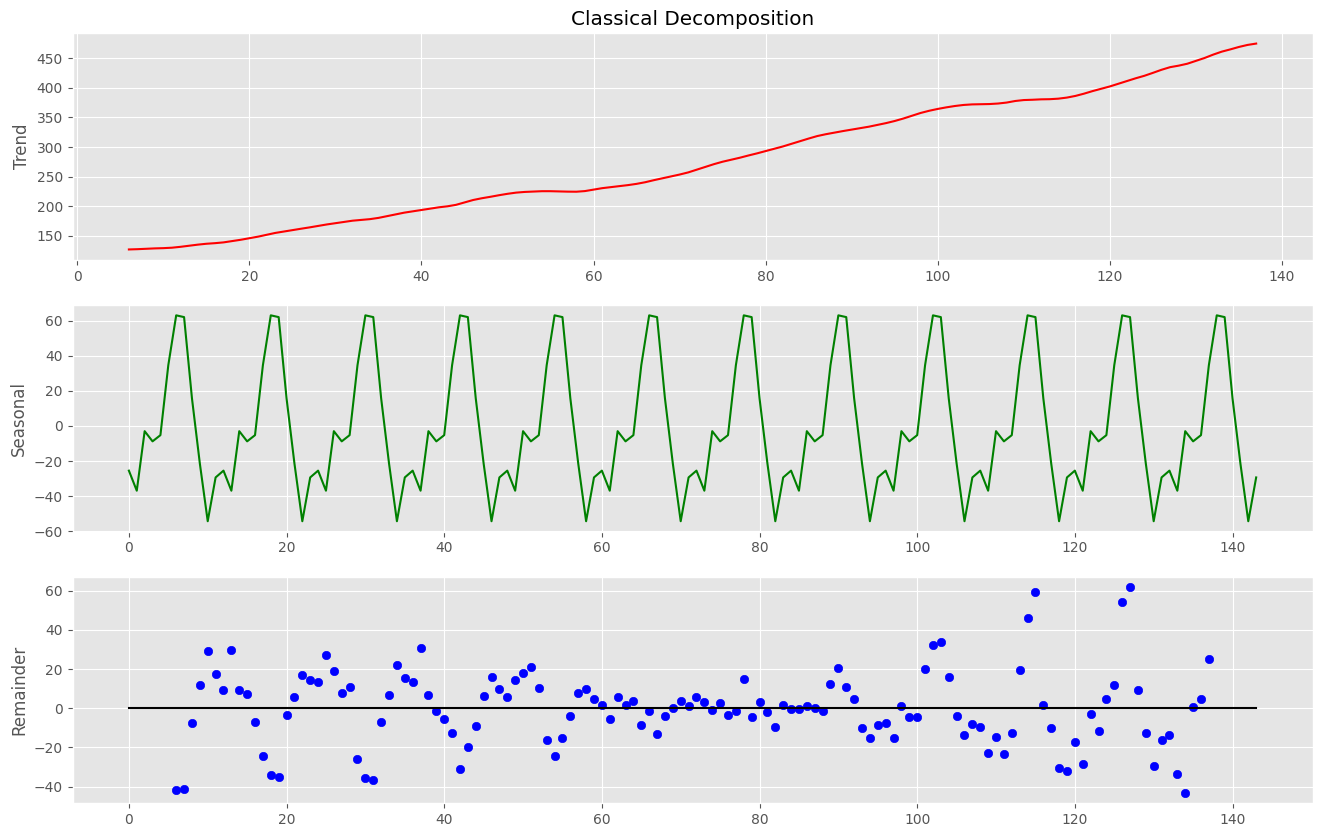

In [6]:
#It is also possible to plot a more customized plot for decomposition results
#By calling the plot_decomp function from chronokit.utils module, you can set additional arguments for the plot
#such as colors, style, figsize etc..
from chronokit.utils import plot_decomp
#The method argument designates the decomposition method used and it is used to draw the line centered around 0 or 1 for the remainder component depending on the method
plot_decomp(trend, seasonal, remainder, method="add", figsize=(16,10), colors=["red", "green", "blue"], style="ggplot", title="Classical Decomposition")

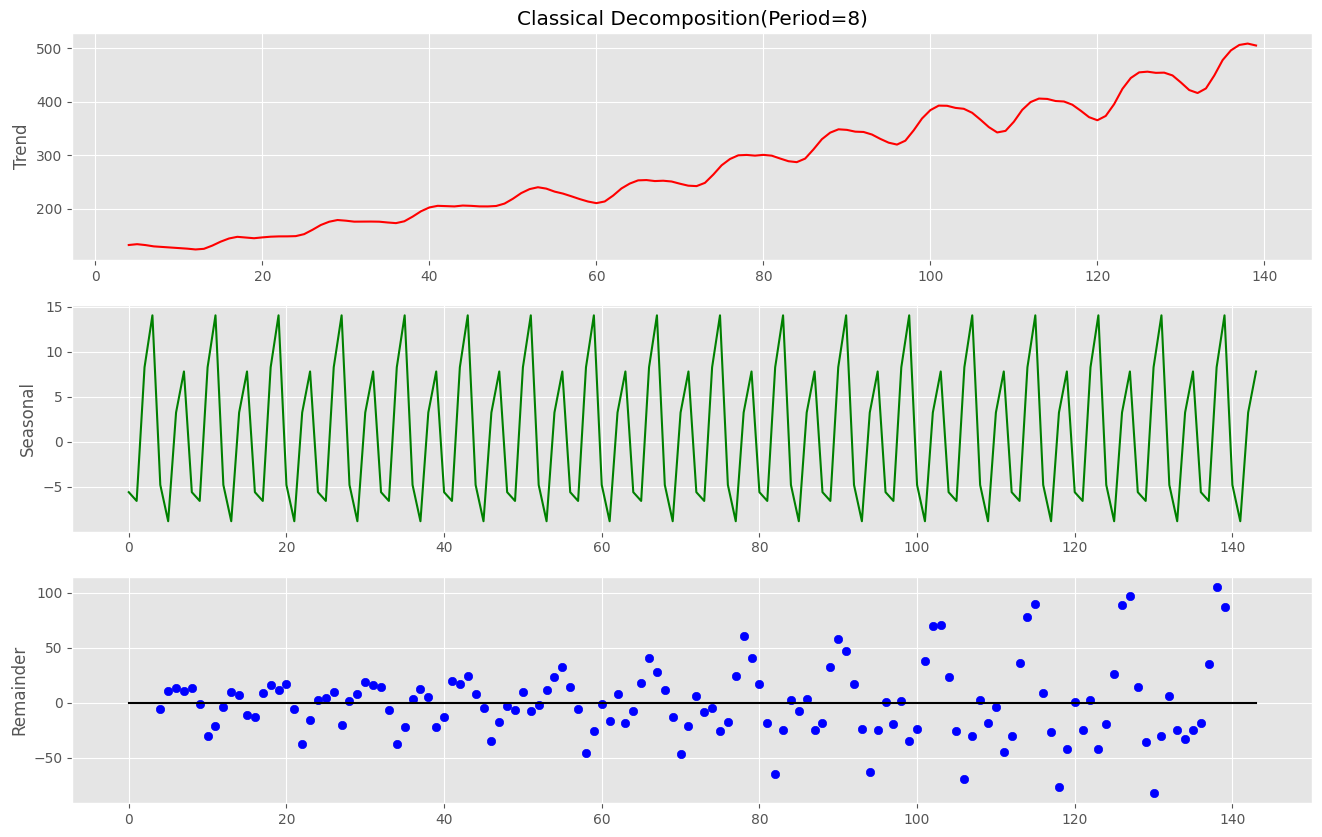

In [7]:
#Different seasonal periods will lead to different results, as they designate the length of a seasonal cycle
trend, seasonal, remainder = decomposition.classical_decomposition(data=df, seasonal_period=8, method="add", show=False)
#Observe that setting seasonal_period=8 instead of 12 lead to bigger residuals, implying that 12 is a better assumption for the length of the seasonal cycle
#It is recommended to try out different periods to see which works best
plot_decomp(trend, seasonal, remainder, "add", figsize=(16,10), colors=["red", "green", "blue"], style="ggplot", title="Classical Decomposition(Period=8)")

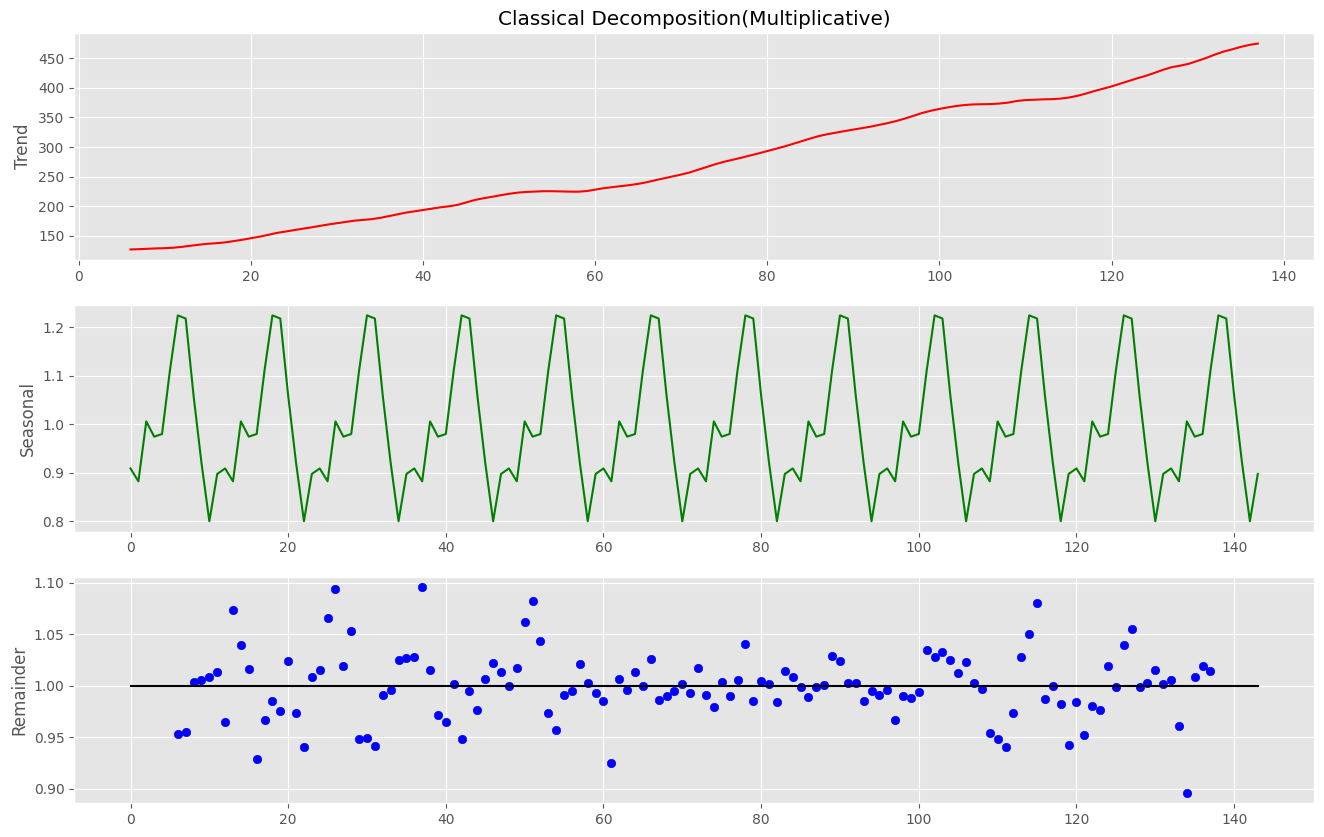

In [8]:
##Multiplicative decomposition can also be used to see whether an additive or multiplicative method yields better results
trend, seasonal, remainder = decomposition.classical_decomposition(data=df, seasonal_period=12, method="mul", show=False)
plot_decomp(trend, seasonal, remainder, "mul", figsize=(16,10), colors=["red", "green", "blue"], style="ggplot", title="Classical Decomposition(Multiplicative)")

### STL Decomposition

##### STL stands for Seasonal-Trend decomposition using LOESS where LOESS is a non-linear regression method
##### The STL method was developed by [R. B. Cleveland, Cleveland, McRae, & Terpenning (1990)](https://www.scb.se/contentassets/ca21efb41fee47d293bbee5bf7be7fb3/stl-a-seasonal-trend-decomposition-procedure-based-on-loess.pdf)

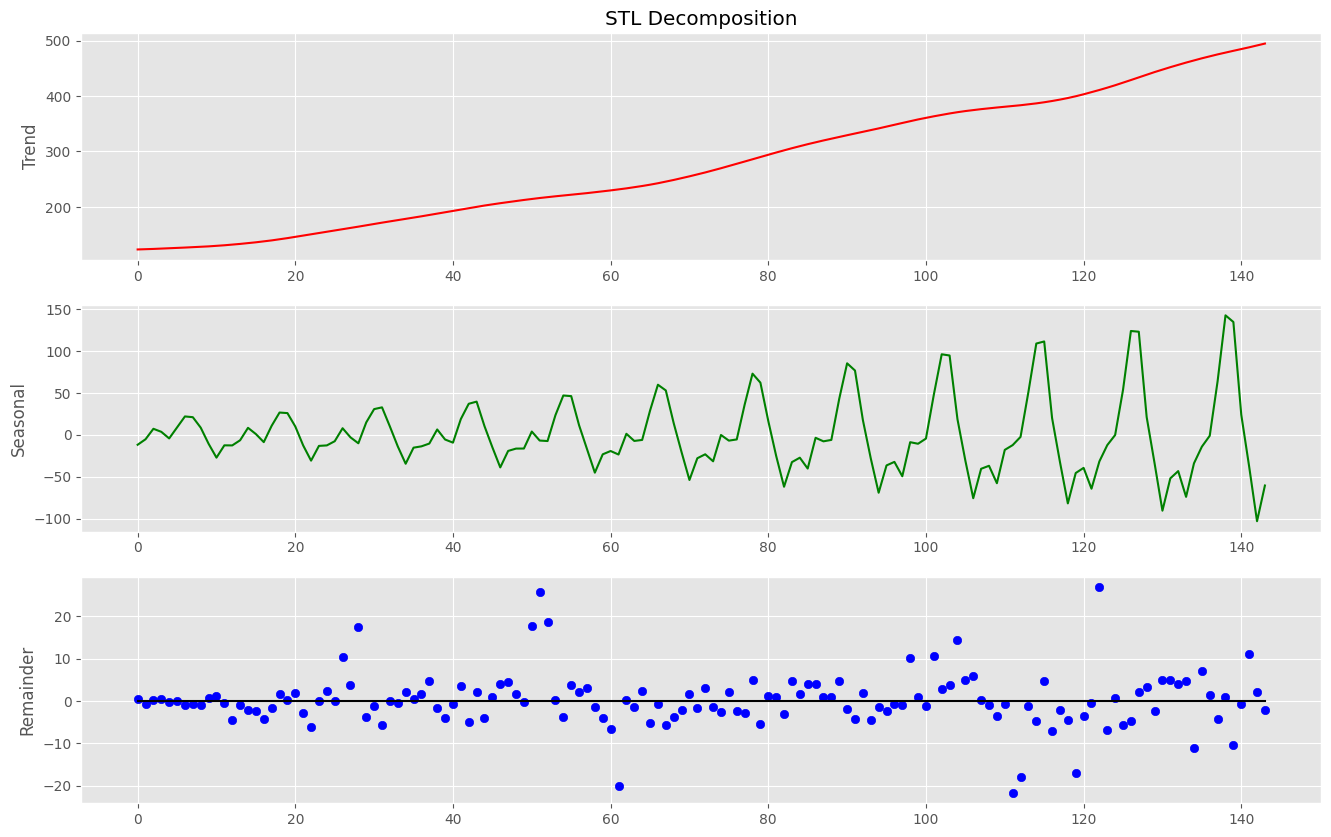

In [9]:
#decomposition.STL() returns the estimated components
trend, seasonal, remainder = decomposition.STL(data=df, seasonal_period=12, method="add")
#By inspecting the remainder component; we can see that additive STL yields to better results than additive classical decomposition at least for our data
#Also note that the seasonal component is not constant over the periods, it starts to have a larger effect on the data as time goes on
plot_decomp(trend, seasonal, remainder, "add", figsize=(16,10), colors=["red", "green", "blue"], style="ggplot", title="STL Decomposition")

### MSTL

##### MSTL stands for Multi-STL and it is used for capturing multiple seasonalities.

##### MSTL works by applying STL decomposition repeatedly to capture multiple seasonalities

The multiple seasonalities essentially combine up to the general seasonality of the data;

* Y = T + S + R; where S = S_1 + S_2 + ... + S_n

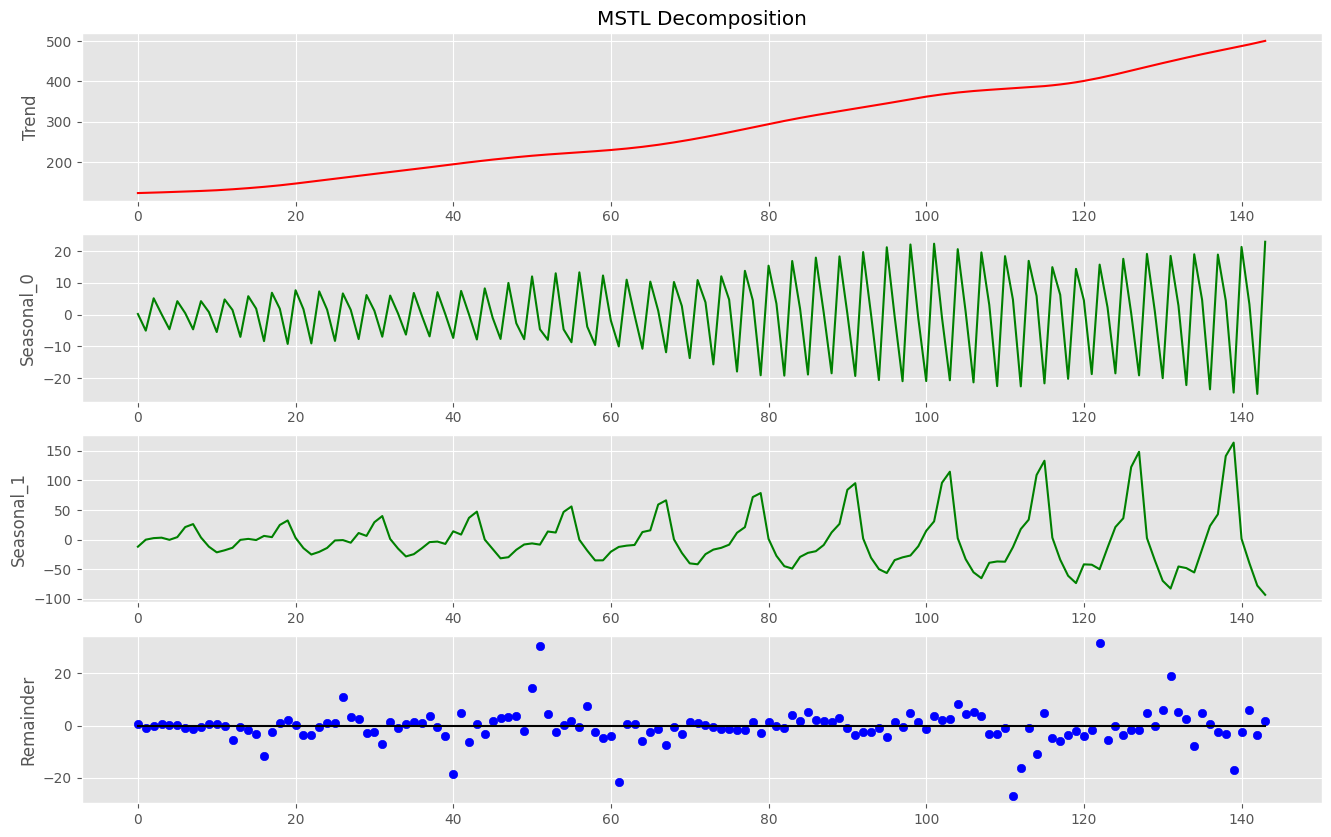

In [10]:
#decomposition.MSTL() will return the estimated components, with seasonal component being an array of shape (num_seasonalities, len(data))
#The MSTL expects seasonal_periods argument as a list, ordered from the period of the seasonality with the shortest cycle to the period of the seasonality with longest cycle
trend, seasonal, remainder = decomposition.MSTL(data=df, seasonal_periods=[3,12], method="add")
#We see that the remainders are generally closer to 0 than STL, however, with some outliers
#It is recommended to try out different combination of seasonal periods and additive/multiplicative methods to see which works best
plot_decomp(trend, seasonal, remainder, "add", figsize=(16,10), colors=["red", "green", "blue"], style="ggplot", title="MSTL Decomposition")